In [66]:
import celltypist
from celltypist import models
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata
import re
import h5py
import scipy.sparse as scs
import concurrent.futures
import scanpy.external as sce
import gc
import harmonypy
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import copy

# Anndata creation

In [29]:
adata = sc.read_h5ad('/home/jupyter/Myeloid_cells/files/Mono_ONLY_FluYr1D0_parallel.h5ad')

In [56]:
adata = sc.read_h5ad('/home/jupyter/Myeloid_cells/files/Mono_ONLY_FluYr1D0_post_leiden.h5ad')

In [48]:
adata

AnnData object with n_obs × n_vars = 301198 × 1419
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3', 'AIFI_L3.5', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden_0.5', 'leiden_1', 'leiden_2', 'leiden_0.2'
    var: 'highly_vari

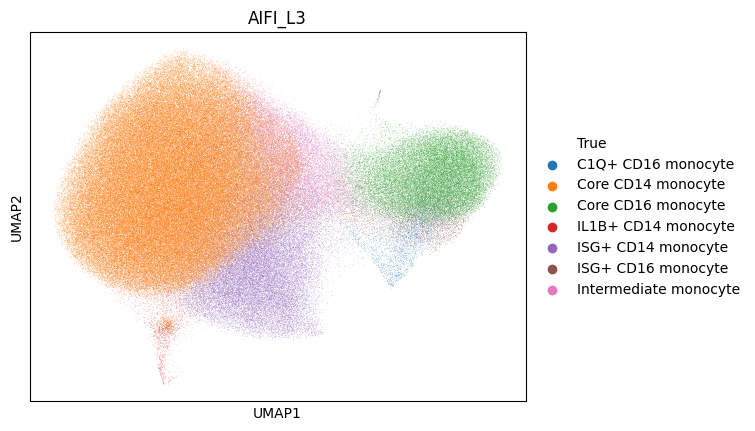

In [19]:
sc.pl.umap(adata, color=['AIFI_L3'], label= True)

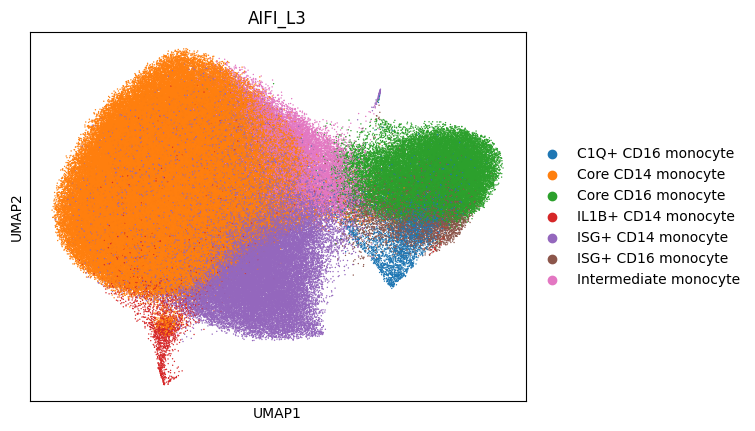

In [25]:
# Plot UMAP with labels
sc.pl.umap(adata, color=['AIFI_L3'], size = 4 )

<Axes: xlabel='AIFI_L3'>

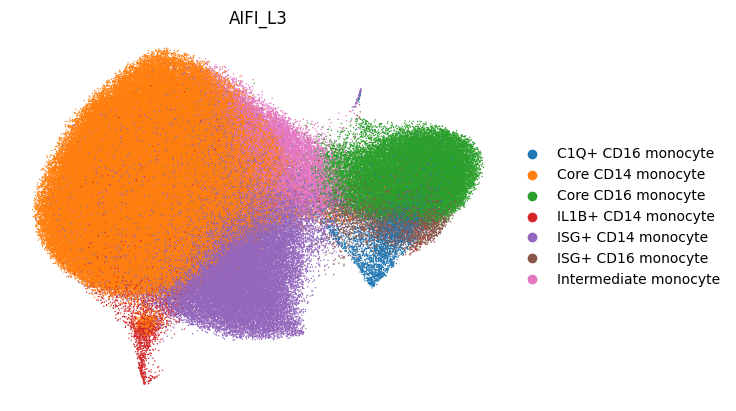

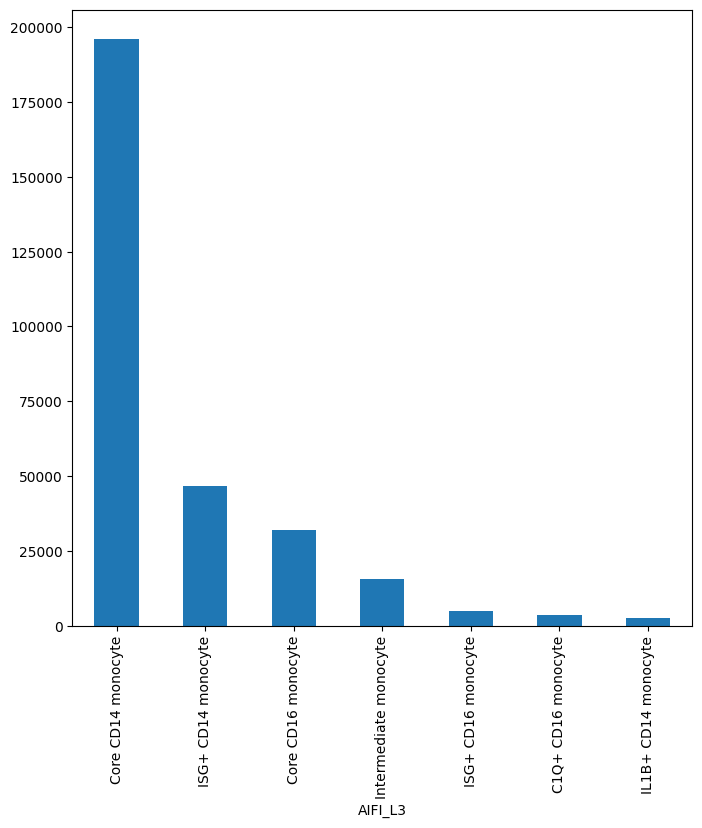

In [67]:
sc.pl.umap(adata, color=['AIFI_L3'], size=4,show=False,ncols=1 ,frameon=False)
sex_cell_cnt=adata.obs['AIFI_L3'].value_counts()
plt.figure(figsize=(8, 8))
sex_cell_cnt.plot(kind='bar')

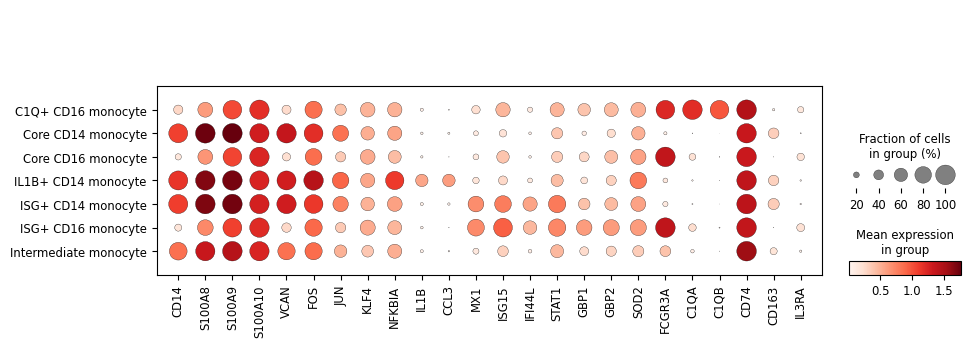

In [69]:
# Perform normalization
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform the data
#sc.pp.log1p(adata)

sc.pl.dotplot(adata, ['CD14', 'S100A8', 'S100A9','S100A10', 'VCAN', 'FOS', 'JUN', 'KLF4', 'NFKBIA', 'IL1B','CCL3', 'MX1', 'ISG15', 'IFI44L','STAT1','GBP1','GBP2','SOD2','FCGR3A',
                     'C1QA', 'C1QB', 'CD74', 'CD163', 'IL3RA', 
                      #'JCHAIN', 'ITM2C', 'AXL', 'SIGLEC6', 'CLEC9A', 'C1orf54', 'IRF8', 'PLAC8', 'SPI1', 'VIM', 'HLA-DPA1', 'HLA-DRA' 
                     ], "AIFI_L3",
              #save=  proj_name+'_rna_TNF_dotpolt.png',
              dendrogram=False, log= True)

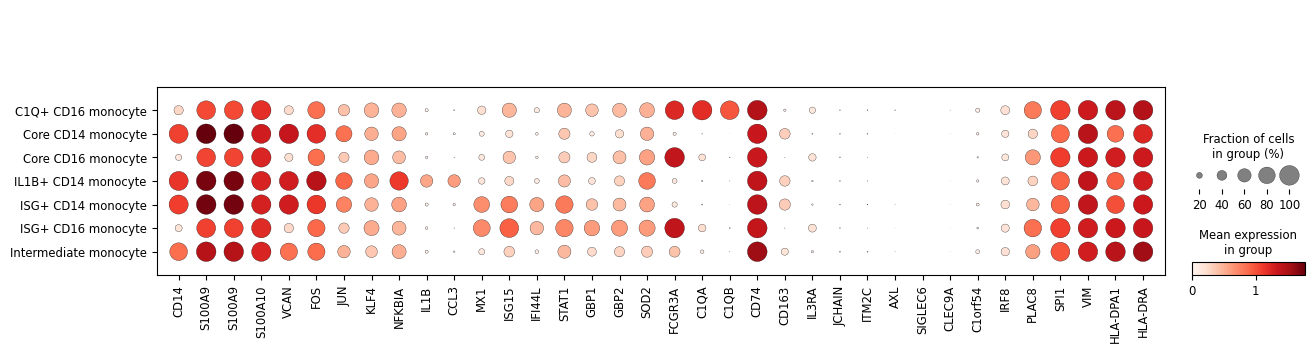

In [65]:
# Perform normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
# Log transform the data
#sc.pp.log1p(adata)

sc.pl.dotplot(adata, ['CD14', 'S100A9', 'S100A9','S100A10', 'VCAN', 'FOS', 'JUN', 'KLF4', 'NFKBIA', 'IL1B','CCL3', 'MX1', 'ISG15', 'IFI44L','STAT1','GBP1','GBP2','SOD2','FCGR3A',
                     'C1QA', 'C1QB', 'CD74', 'CD163', 'IL3RA', 'JCHAIN', 'ITM2C', 'AXL', 'SIGLEC6', 'CLEC9A', 'C1orf54', 'IRF8', 'PLAC8', 'SPI1', 'VIM', 'HLA-DPA1', 'HLA-DRA' ], "AIFI_L3",
              #save=  proj_name+'_rna_TNF_dotpolt.png',
              dendrogram=False, log= True)

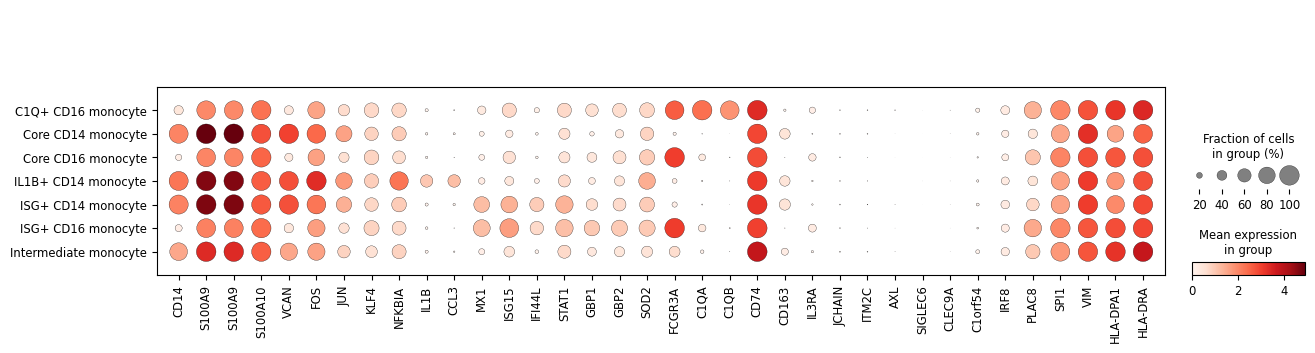

In [62]:
# Perform normalization
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform the data
#sc.pp.log1p(adata)

sc.pl.dotplot(adata, ['CD14', 'S100A9', 'S100A9','S100A10', 'VCAN', 'FOS', 'JUN', 'KLF4', 'NFKBIA', 'IL1B','CCL3', 'MX1', 'ISG15', 'IFI44L','STAT1','GBP1','GBP2','SOD2','FCGR3A',
                     'C1QA', 'C1QB', 'CD74', 'CD163', 'IL3RA', 'JCHAIN', 'ITM2C', 'AXL', 'SIGLEC6', 'CLEC9A', 'C1orf54', 'IRF8', 'PLAC8', 'SPI1', 'VIM', 'HLA-DPA1', 'HLA-DRA' ], "AIFI_L3",
              #save=  proj_name+'_rna_TNF_dotpolt.png',
              dendrogram=False)